# Visualisation and post-processing

In this task, we'll learn how to visualise FESTIM results.

Let's create a 1D simulation.

In [1]:
import festim as F
import numpy as np

my_model = F.Simulation()

my_model.mesh = F.MeshFromVertices(
    vertices=np.linspace(0, 1, num=1000)
)

my_material = F.Material(id=1, D_0=1, E_D=0.2)
my_model.materials = my_material

my_model.traps = F.Trap(k_0=1, E_k=0, p_0=0.1, E_p=0, materials=my_material, density=0.5)

# temperature varying in space and time
my_model.T = F.Temperature(500 + F.x + F.t)

my_model.boundary_conditions = [
    F.DirichletBC(
        surfaces=[1, 2],
        value=1 + F.x,  # 1 in x=0, 2 in x=1
        field=0
        )
]

my_model.settings = F.Settings(
    absolute_tolerance=1e-10,
    relative_tolerance=1e-10,
    final_time=100
    )

my_model.dt = F.Stepsize(0.1, stepsize_change_ratio=1.1, dt_min=1e-5)

We now want to export the temperature, the mobile concentration field, and the total retention (mobile + trapped).

>
> Note: in 1D, to visualise the XDMF files in Paraview, the `checkpoint` argument needs to be `False` (see [#134](https://github.com/RemDelaporteMathurin/FESTIM/issues/134))
>

In [2]:
export_folder = "task5"

xdmf_exports = [
    F.XDMFExport(field="solute", filename=export_folder + "/hydrogen_concentration.xdmf", checkpoint=False),
    F.XDMFExport(field="retention", filename=export_folder + "/retention.xdmf", checkpoint=False),
    F.XDMFExport(field="T", filename=export_folder + "/T.xdmf", checkpoint=False),
]

We would also like to visualise the total hydrogen inventory, the particle fluxes at the surfaces, and the average temperature.

In [3]:
derived_quantities = F.DerivedQuantities(
    [
        F.TotalVolume(field="retention", volume=1),
        F.HydrogenFlux(surface=1),
        F.HydrogenFlux(surface=2),
        F.AverageVolume(field="T", volume=1)
    ],
    filename=export_folder + "/derived_quantities.csv"
)

my_model.exports = [derived_quantities] + xdmf_exports

In [4]:
my_model.initialise()

my_model.run()

Calling FFC just-in-time (JIT) compiler, this may take some time.
Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
100.0 %        1.0e+02 s    Ellapsed time so far: 5.2 s


Several files were created.

The XDMF files can be opened in [Paraview](https://www.paraview.org/) for visualisation.

The derived_quantities.csv file can be read in Excel, or programmatically in python.


In [5]:
# load the csv file with numpy
data = np.genfromtxt(export_folder + "/derived_quantities.csv", delimiter=",", names=True)

# print the columns names
print(data.dtype.names)

('ts', 'Total_retention_volume_1', 'Flux_surface_1_solute', 'Flux_surface_2_solute', 'Average_T_volume_1')


In [6]:
print(data["ts"])

[  0.1          0.21         0.331        0.4641       0.61051
   0.771561     0.9487171    1.14358881   1.35794769   1.59374246
   1.85311671   2.13842838   2.45227121   2.79749834   3.17724817
   3.59497299   4.05447028   4.55991731   5.11590904   5.72749995
   6.40024994   7.14027494   7.95430243   8.84973268   9.83470594
  10.91817654  12.10999419  13.42099361  14.86309297  16.44940227
  18.1943425   20.11377675  22.22515442  24.54766986  27.10243685
  29.91268053  33.00394859  36.40434344  40.14477779  44.25925557
  48.78518112  53.76369924  59.24006916  65.26407608  71.89048369
  79.17953205  87.19748526  96.01723378 100.        ]


Text(0, 0.5, 'H flux')

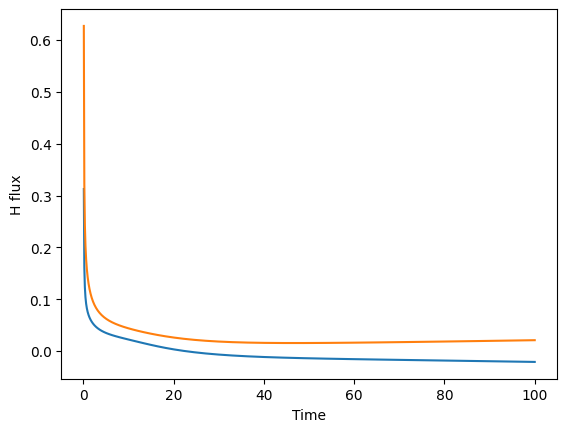

In [7]:
import matplotlib.pyplot as plt

plt.plot(data["ts"], data["Flux_surface_1_solute"])
plt.plot(data["ts"], data["Flux_surface_2_solute"])

plt.xlabel("Time")

plt.ylabel("H flux")

Alternatively, one can use the `plot` function of FEniCS to plot fields directly.

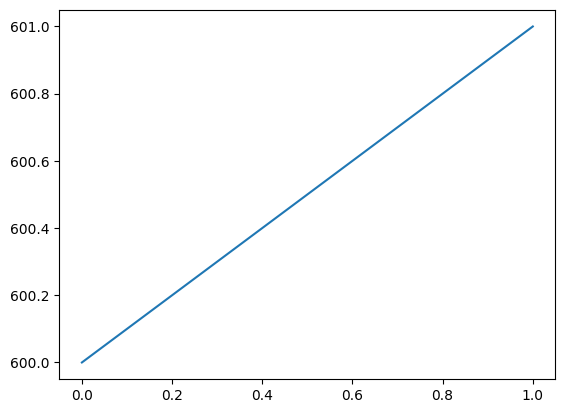

In [8]:
from fenics import plot

plot(my_model.T.T)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


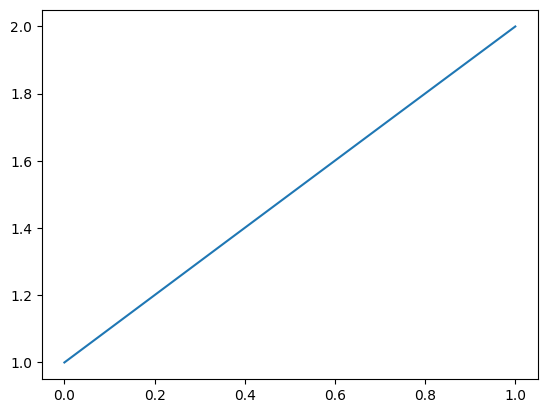

In [9]:
plot(my_model.h_transport_problem.mobile.solution)

If the workshop if being run in GitHub codespaces, the XDMF files will not be readable in Paraview, however this is how they should look:

Temperature field:
<p align="center">
  <img src="https://github.com/festim-dev/FESTIM-workshop/assets/65899899/3db25229-a752-49b9-9ba4-2b19d1dc3252" width="30%">
</p>

Temperature profile:
<p align="center">
  <img src="https://github.com/festim-dev/FESTIM-workshop/assets/65899899/2c135663-a1aa-4c1d-9eef-d4a615b34bc0" width="30%">
</p>

Mobile concentration and retention profiles:
<p align="center">
  <img src="https://github.com/festim-dev/FESTIM-workshop/assets/65899899/2ca1b424-652b-4b6d-8b37-51905cc9f7b3" width="30%">
</p>